- LSTM Long short-term memory
- GRUs Gated Recurrent Units

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

### Implemennting LSTM
#### From scratch

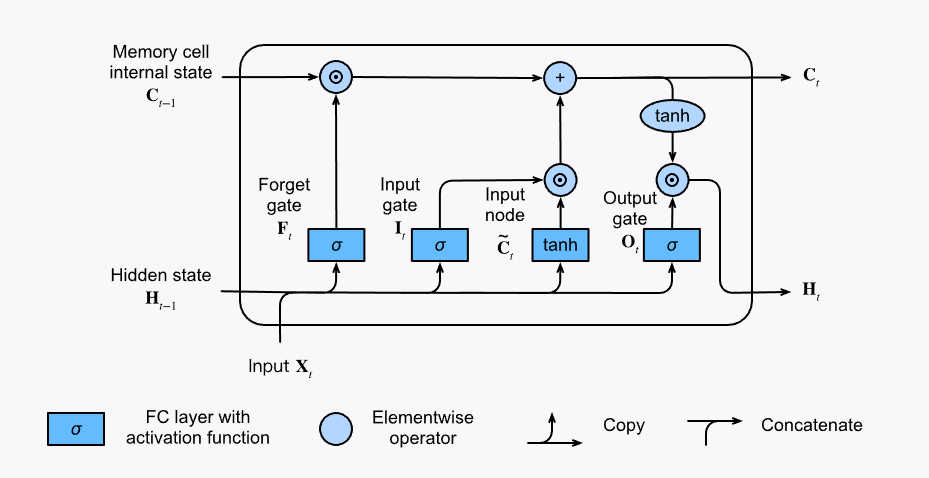

In [3]:
class LSTMScratch(d2l.Module):
    def __init__(self, num_inputs, num_hiddens, sigma=0.01):
        super.__init__()
        self.save_hyperparameters()

        init_weight = lambda * shape: nn.Parameter(torch.randn(shape) * sigma)

        # Creates a
        triple = lambda: (init_weight(num_inputs, num_hiddens),
                          init_weight(num_hiddens, num_hiddens),
                          nn.Parameter(torch.zeros(num_hiddens)))
        
        self.W_xi, self.W_hi, self.b_i = triple()  # Input Gate
        self.W_xf, self.W_hf, self.b_f = triple()  # Forget Gate
        self.W_xo, self.W_ho, self.b_o = triple()  # Output Gate
        self.W_xc, self.W_hc, self.b_c = triple()  # Input Node